In [1]:
import pandas as pd
import numpy as np
import random
import timeit
import requests
from config import api_key

In [2]:
lats=np.random.uniform(-90.000,90.000, size=1500)
lngs=np.random.uniform(-180.000,180.000, size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)
len(coordinates)

1500

In [4]:
city="London"
url="http://api.openweathermap.org/data/2.5/weather?"
query_url= url + "appid=" + api_key + "&q=" + city

In [5]:
resp= requests.get(query_url)
print(resp)
resp.json()

<Response [200]>


{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 303.56,
  'feels_like': 304.48,
  'temp_min': 301.6,
  'temp_max': 305.36,
  'pressure': 1025,
  'humidity': 48},
 'visibility': 10000,
 'wind': {'speed': 2.57, 'deg': 0},
 'clouds': {'all': 0},
 'dt': 1626618283,
 'sys': {'type': 2,
  'id': 268730,
  'country': 'GB',
  'sunrise': 1626581075,
  'sunset': 1626638909},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [6]:
cities=[]
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    cities.append(city)
print(len(cities))

1500


In [9]:
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
# from datetime import datetime
# datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [13]:
from datetime import datetime
city_data = []
for city in cities:
#     print(city)
    url="http://api.openweathermap.org/data/2.5/weather?"
    query_url= url + "appid=" + api_key + "&q=" + city
    resps=requests.get(query_url).json()
#     print(resps)
    try:
#         print(resps["weather"][0]["main"])
        country = resps["sys"]["country"]
        lat = resps["coord"]["lat"]
        lng = resps["coord"]["lon"]
        max_temp = resps["main"]["temp_max"]
        humidity = resps["main"]["humidity"]
        clouds = resps["clouds"]["all"]
        wind = resps["wind"]["speed"]
        date = resps["dt"]
        city_date=datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({"City": city.title(),
                          "Lat": lat,
                          "Lng": lng,
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": city_date})       
    except KeyError:
        pass 

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)       

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,296.13,96,99,5.81,EC,2021-07-18 14:34:34
1,Esperance,-33.8667,121.9000,286.06,82,15,6.20,AU,2021-07-18 14:34:34
2,Nemuro,43.3236,145.5750,291.69,88,0,2.06,JP,2021-07-18 14:34:34
3,Arraial Do Cabo,-22.9661,-42.0278,298.13,78,20,3.09,BR,2021-07-18 14:34:35
4,Dikson,73.5069,80.5464,275.25,86,21,4.92,RU,2021-07-18 14:33:07
5,La Ronge,55.1001,-105.2842,284.29,93,90,3.60,CA,2021-07-18 14:34:35
6,Hami,42.8000,93.4500,301.15,30,100,4.76,CN,2021-07-18 14:34:35
7,Lokosovo,61.1333,74.8167,288.84,79,91,1.68,RU,2021-07-18 14:34:36
8,Jizan,17.3333,42.6667,307.67,29,42,10.08,SA,2021-07-18 14:34:36
9,Yar-Sale,66.8333,70.8333,286.70,63,30,3.60,RU,2021-07-18 14:34:36


In [ ]:
city_data_df.info()

In [14]:
new_columns_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_columns_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2021-07-18 14:34:34,-0.7393,-90.3518,296.13,96,99,5.81
1,Esperance,AU,2021-07-18 14:34:34,-33.8667,121.9000,286.06,82,15,6.20
2,Nemuro,JP,2021-07-18 14:34:34,43.3236,145.5750,291.69,88,0,2.06
3,Arraial Do Cabo,BR,2021-07-18 14:34:35,-22.9661,-42.0278,298.13,78,20,3.09
4,Dikson,RU,2021-07-18 14:33:07,73.5069,80.5464,275.25,86,21,4.92


In [12]:
# output_data_file = "./cities.csv"
# city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
northern_hemi_df=city_data_df[(city_data_df["Lat"]>=0)]
southern_hemi_df=city_data_df[(city_data_df["Lat"]<0)]

In [29]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

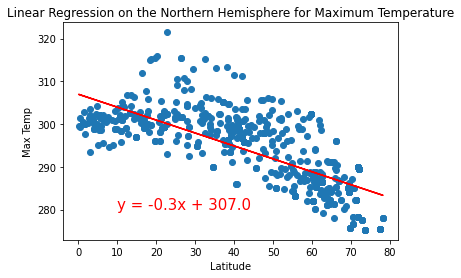

In [43]:
x_values=northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression( x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,280))

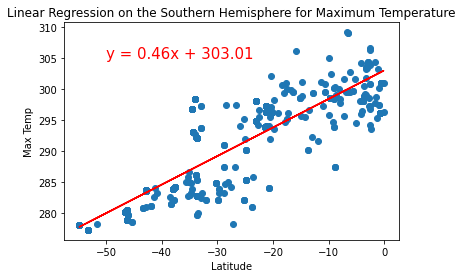

In [47]:
x_values=southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression( x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,305))

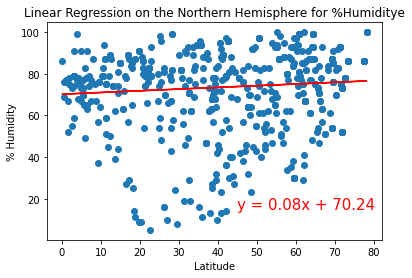

In [68]:
x_values=northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression( x_values, y_values, 'Linear Regression on the Northern Hemisphere for %Humiditye', 
                       '% Humidity',(45,15))

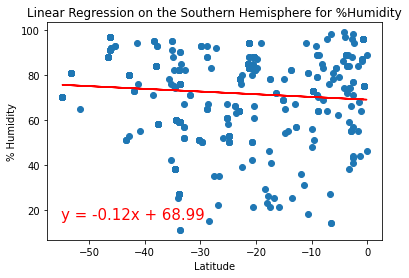

In [67]:
x_values=southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression( x_values, y_values, 'Linear Regression on the Southern Hemisphere for %Humidity', 
                       '% Humidity',(-55,16))

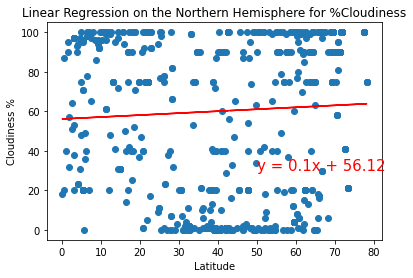

In [65]:
x_values=northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression( x_values, y_values, 'Linear Regression on the Northern Hemisphere for %Cloudiness', 
                       'Cloudiness %',(50,30))

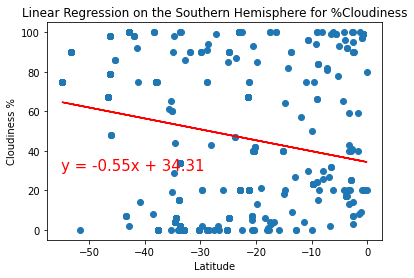

In [66]:
x_values=southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression( x_values, y_values, 'Linear Regression on the Southern Hemisphere for %Cloudiness', 
                       'Cloudiness %',(-55,30))

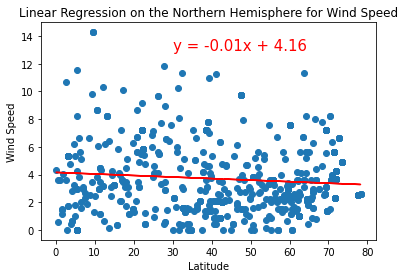

In [78]:
x_values=northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression( x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(30,13))


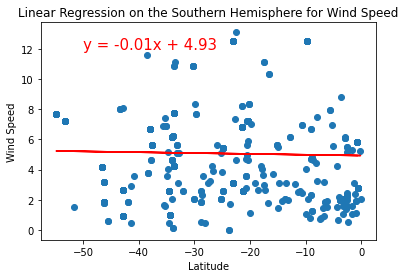

In [74]:
x_values=southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression( x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,12))